In [1]:
%run ../../__init__.py
%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
test_dir = "/home/konstantin/personal/Summertime/runs/test/megadepth/"
evaluation_task = eva_ns.REL_POSE

In [3]:
methods = {
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'sift_disk': {eva_ns.COLOR: 'orange',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'SIFT+DISK'},
    
    'superpoint_disk': {eva_ns.COLOR: 'gold',
                        eva_ns.LINE_STYLE: '-',
                        eva_ns.ALIAS: 'SuperPoint+DISK'},
    
    'r2d2_disk': {eva_ns.COLOR: 'blue',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'R2D2+DISK'},
    
    'keynet_disk': {eva_ns.COLOR: 'red',
                    eva_ns.LINE_STYLE: '-',
                    eva_ns.ALIAS: 'KeyNet+DISK'},
    
    'disk': {eva_ns.COLOR: 'purple',
             eva_ns.LINE_STYLE: '-',
             eva_ns.ALIAS: 'DISK'},
    
    'rekd_disk': {eva_ns.COLOR: 'hotpink',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'REKD+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
}

In [4]:
methods_disk_f_pydegensac = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'PyDEGENSAC, DISK',
        eva_ns.SAVE_DIR: 'figures/test',        
        eva_ns.SAVE_NAME: 'disk.pdf',
        
        eva_ns.NUM_INL: {
            eva_ns.SAVE_DIR: 'figures/test/num_inl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 10
        },
        
        eva_ns.CAT_ABL: {
            eva_ns.SAVE_DIR: 'figures/test/cat_abl',
            eva_ns.SAVE_NAME: 'disk.pdf',
            
            eva_ns.FONT_SIZE: 3.5,
            eva_ns.LEGEND_LOC: ['lower left', 'lower right']
        }
    }
}

In [5]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None
    
methods_list = prepare_methods_list([methods_disk_f_pydegensac], select)

In [6]:
from source.evaluation.rel_pose.logging import load_rel_pose_eval

r_acc_list, t_acc_list, num_inl_list = load_rel_pose_eval(test_dir, evaluation_task, methods_list)

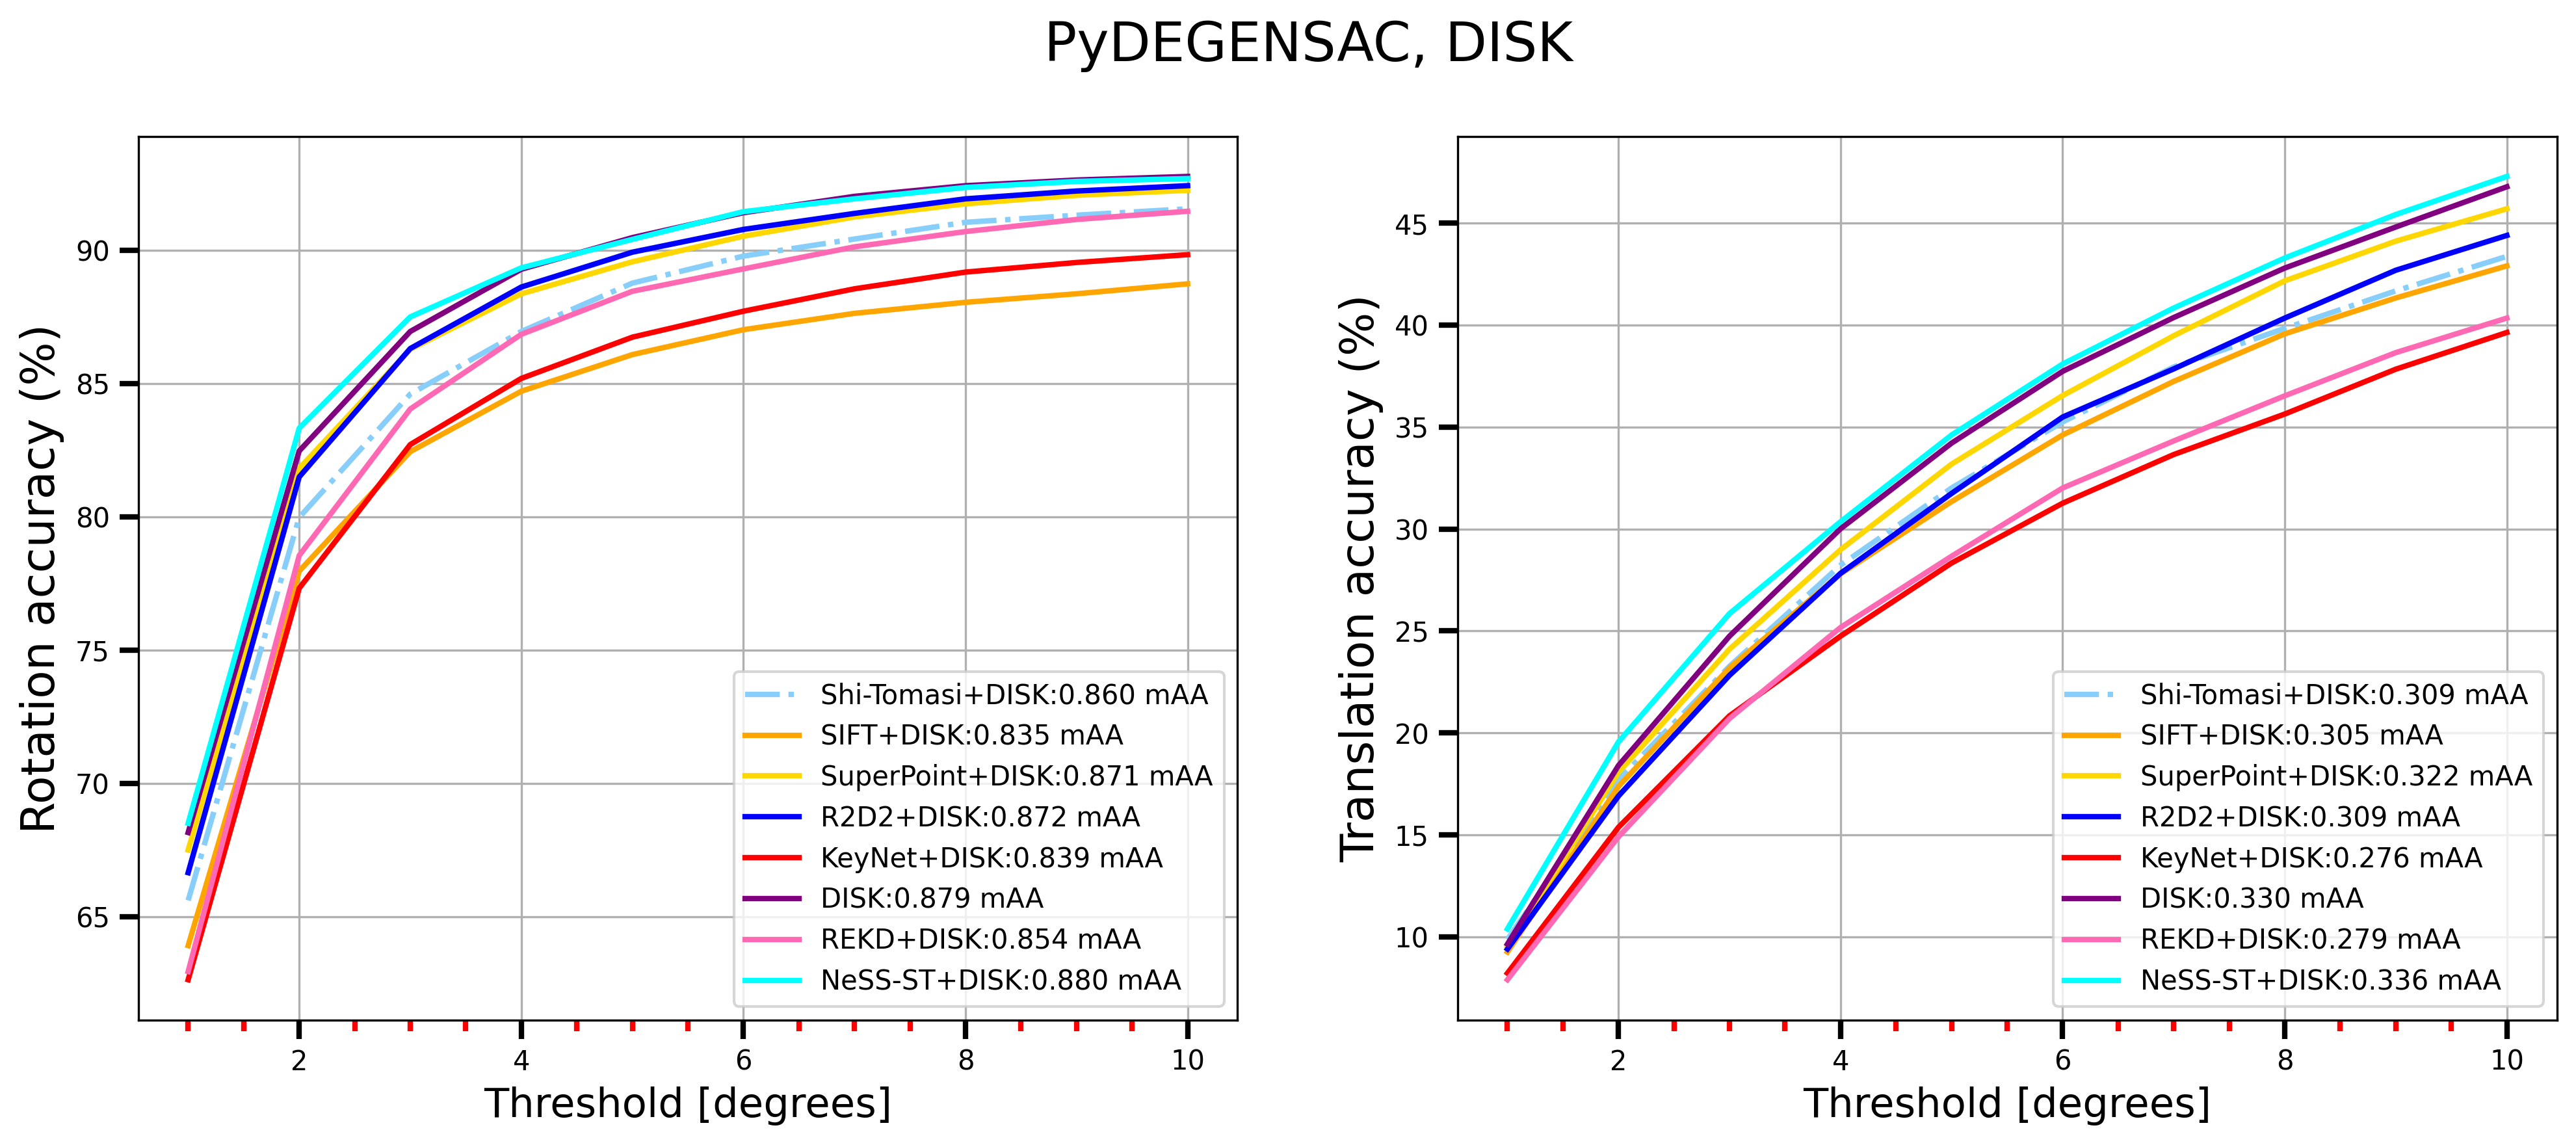

In [7]:
from source.evaluation.rel_pose.vis import RelPoseAccuracyPlotter

vis_indices = None

RelPoseAccuracyPlotter(methods_list,
                       r_acc_list, t_acc_list,
                       vis_indices).plot_all(save)

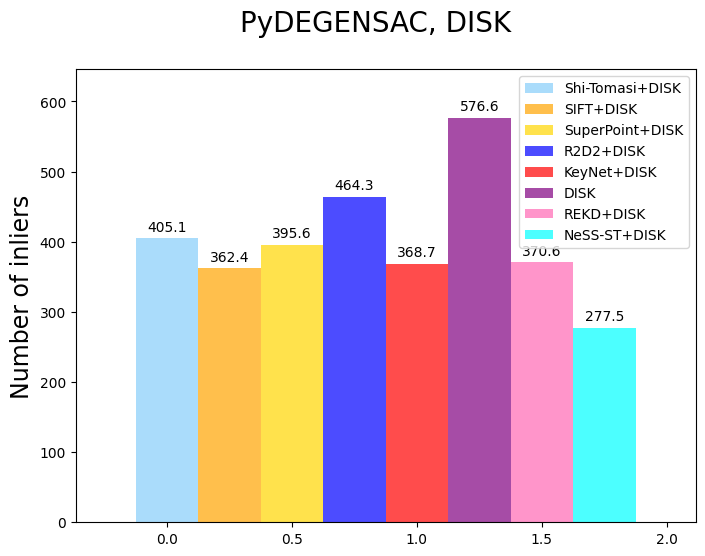

In [8]:
from source.evaluation.rel_pose.vis import RelPoseNumInlPlotter

RelPoseNumInlPlotter(methods_list,
                     num_inl_list,
                     vis_indices).plot_all(save)

In [9]:
city_panorama = [0, 2, 11, 47, 50, 103, 105, 143, 177, 265, 366, 860]
buildings = [3, 22, 25, 26, 33, 94, 129, 175, 178, 294, 412, 430, 5013, 5014, 5015, 5016, 5017, 16, 121, 443]
indoors = [20, 176, 204, 223, 474]
statues = [107, 168, 229, 349, 768, 5018]
wild = [1001, 4541]

test_cats = [city_panorama, buildings, indoors, statues, wild]
cat_names = ['City panorama', 'Buildings/City area', 'Indoors', 'Statues', 'Wild']

In [10]:
from source.evaluation.rel_pose.logging import load_cat_rel_pose_eval

r_mAA_list, t_mAA_list = load_cat_rel_pose_eval(test_dir, evaluation_task, methods_list, test_cats)

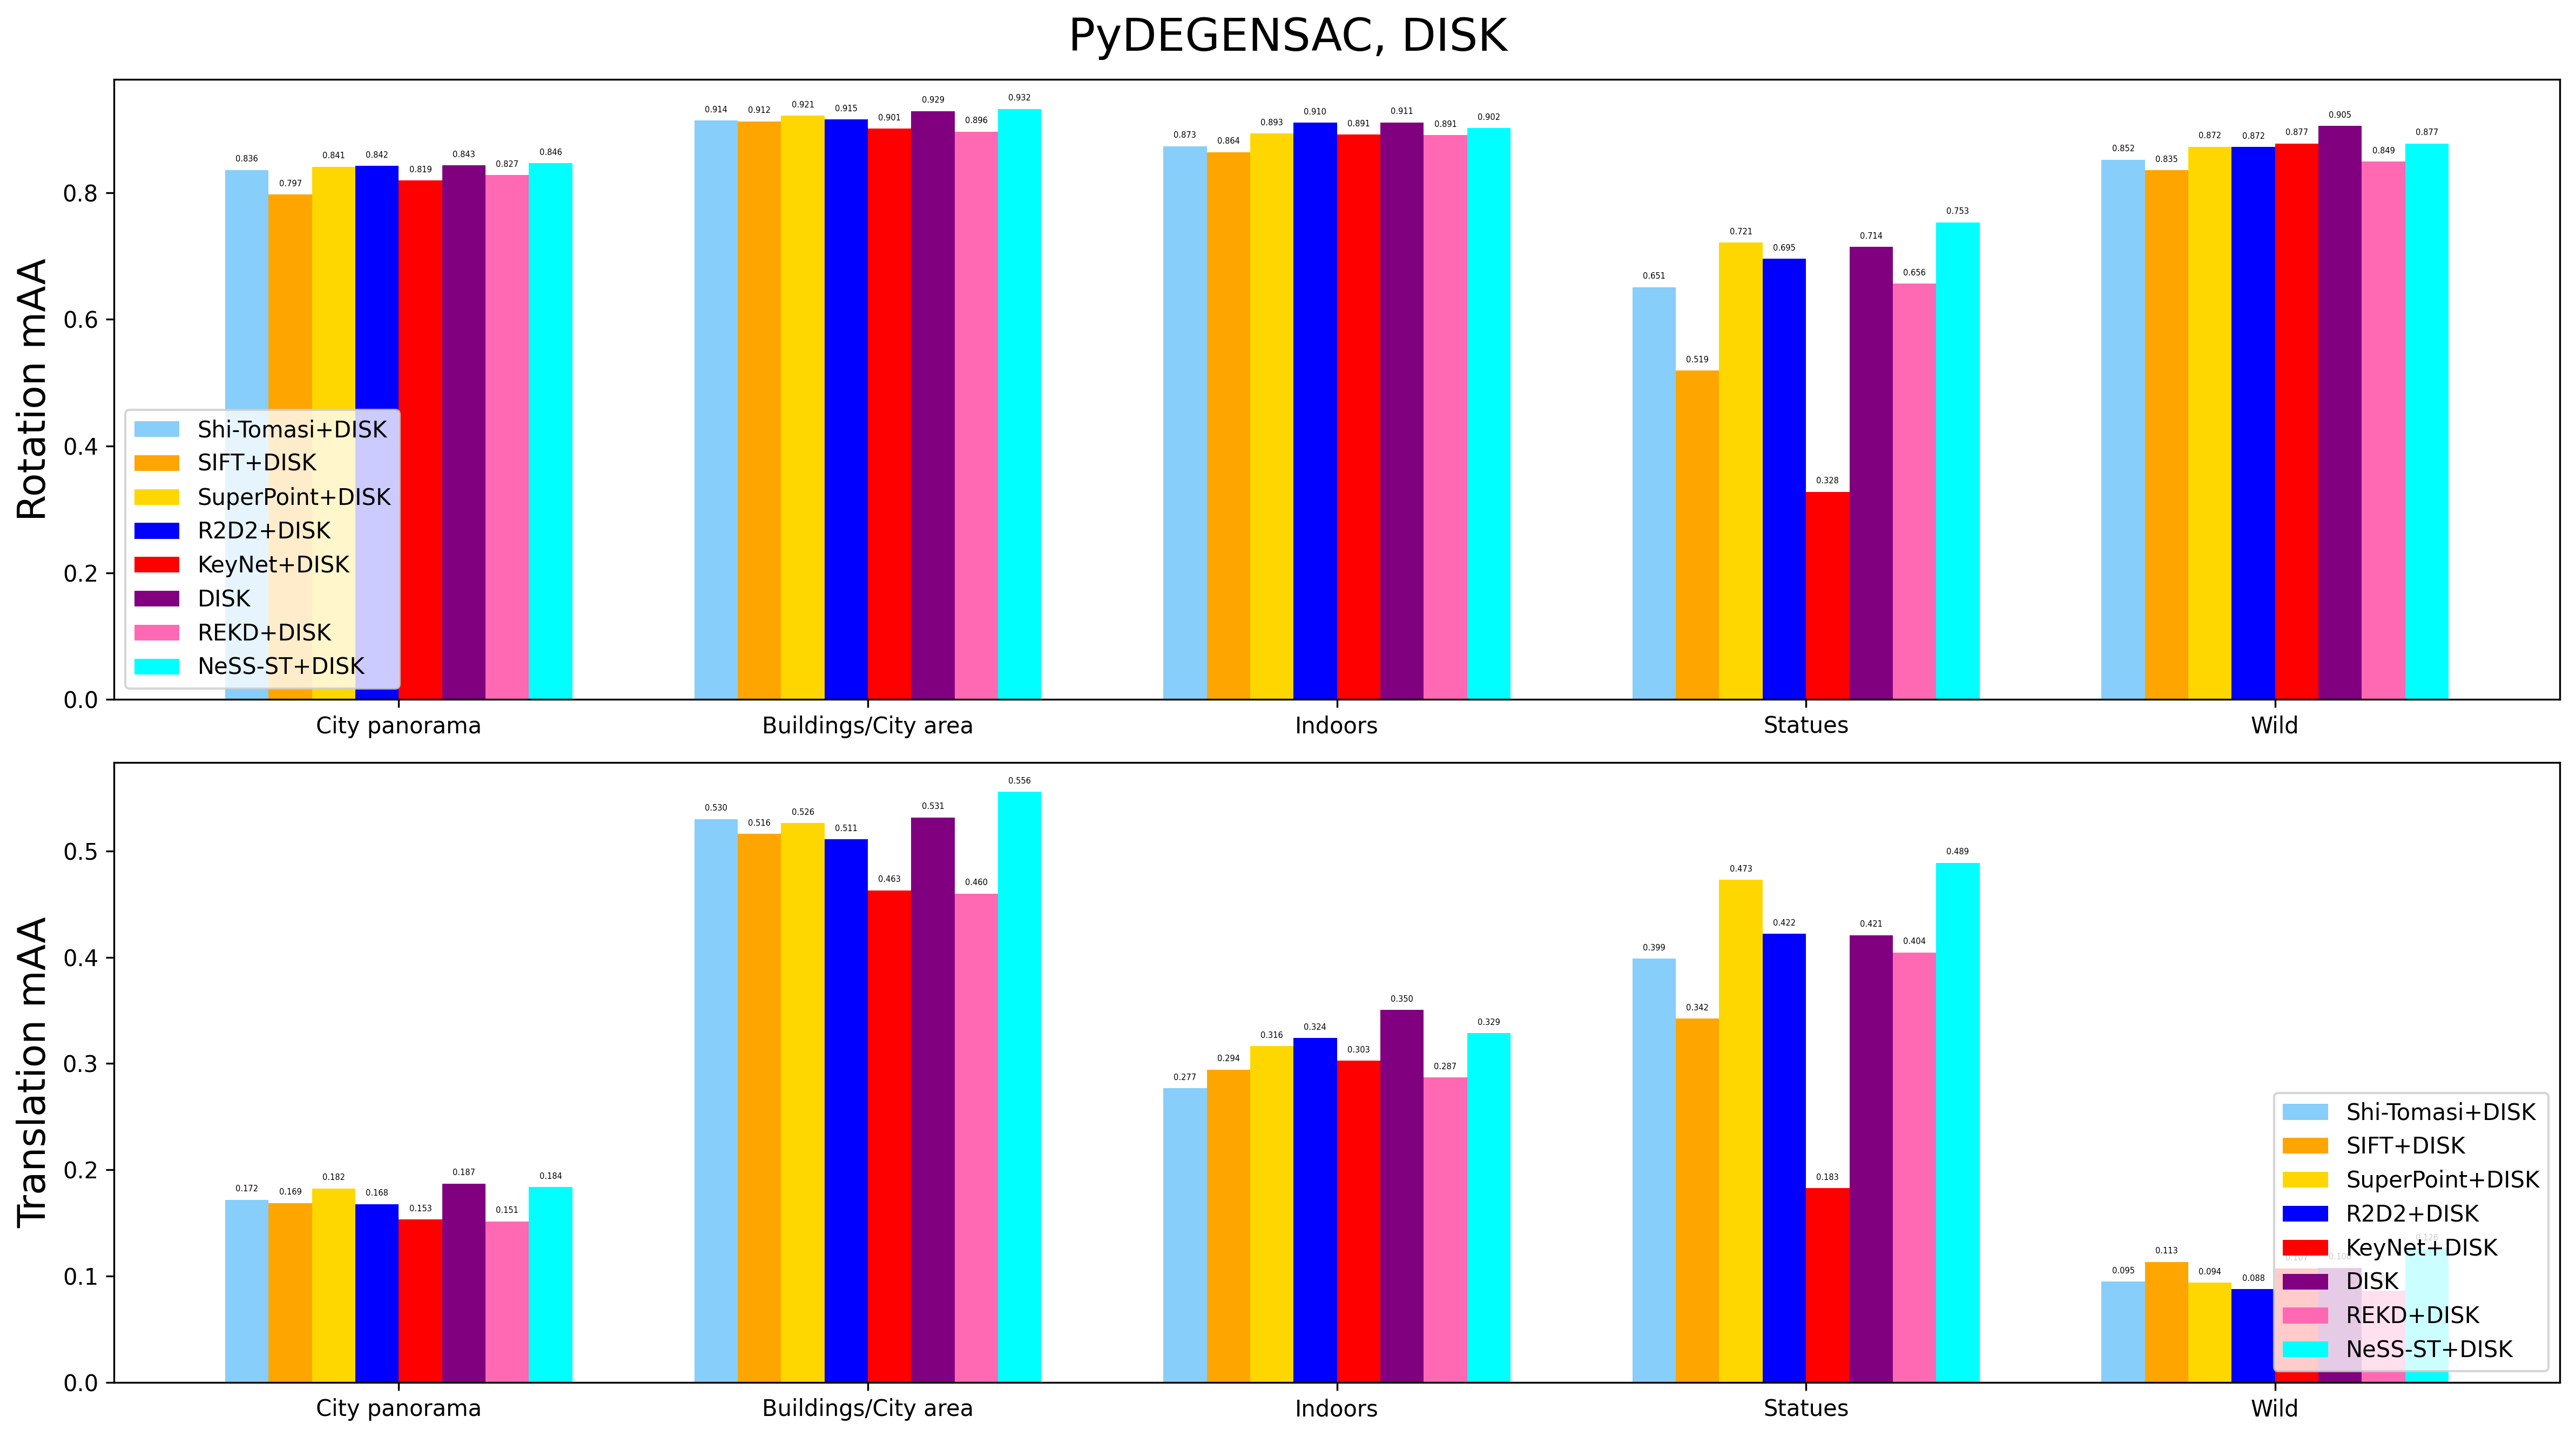

In [11]:
from source.evaluation.rel_pose.vis import CatRelPosemAAPlotter

CatRelPosemAAPlotter(methods_list, cat_names,
                     r_mAA_list, t_mAA_list,
                     vis_indices).plot_all(save)